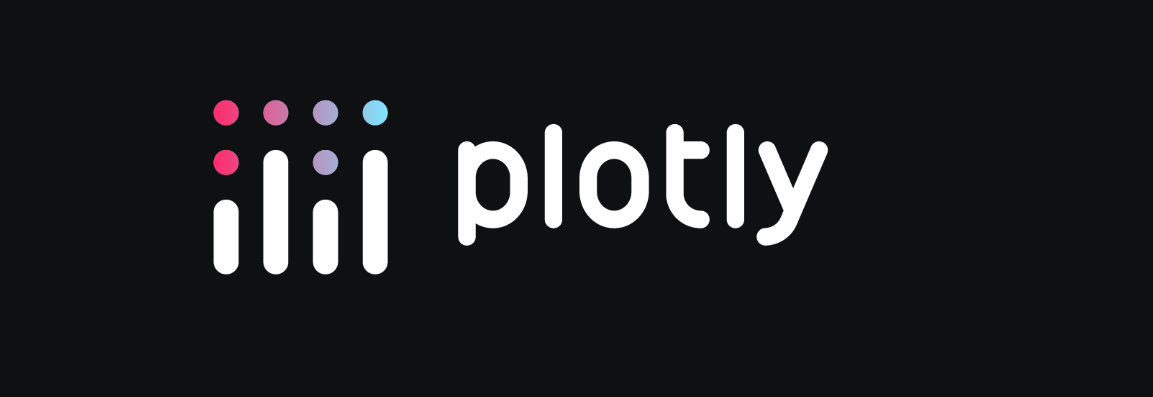

## 📈 Biblioteca Plotly

📌 [Documentação](https://plotly.com/python/)

>### Importação

- **import plotly.express as px**

>### Funções Importantes

- **fig.update_layout('Diversos Parâmetros')** -> Customizar o layout do gráfico

- **fig.show()** -> Plota o gráfico

- **fig.update_traces(line_color='indigo', line_width=4)** -> Customização dos gráficos

- **fig.write_html('arquivo.html')** -> Salvar o gráfico em html

>### Gráfico de Linhas

- **px.line(df, x=, y=, title=)** -> Cria um gráfico de linhas


In [1]:
import pandas as pd
import plotly.express as px

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/bibliotecas_visualizacao/main/Dados/imigrantes_canada.csv')

In [3]:
df.set_index('País', inplace=True)

In [4]:
anos = list(map(str, range(1980, 2014)))
brasil = df.loc['Brasil', anos]
brasil_dict = {'Ano': brasil.index.tolist(), 'Imigrantes': brasil.values.tolist()}
dados_brasil = pd.DataFrame(brasil_dict)

In [6]:
fig = px.line(dados_brasil, x='Ano', y='Imigrantes',
              title= 'Imigração do Brasil para o Canadá\n1980 a 2013')

fig.update_layout(width=1000, height=500, 
                  xaxis={'tickangle':-45},
                  font_family='Arial',
                  font_size=14,
                  font_color='grey',
                  title_font_size=18,
                  title_font_color='black',
                  xaxis_title='Ano',
                  yaxis_title='Número de Imigrantes')

fig.update_traces(line_color='indigo', line_width=4)

fig.show()

In [7]:
america_sul = df.query('Região == "América do Sul"')

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Argentina,América Latina e o Caribe,América do Sul,368,426,626,241,237,196,213,519,...,1153,847,620,540,467,459,278,263,282,19596
Bolívia,América Latina e o Caribe,América do Sul,44,52,42,49,38,44,79,165,...,134,139,107,143,214,180,86,83,107,3205
Brasil,América Latina e o Caribe,América do Sul,211,220,192,139,145,130,205,244,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
Chile,América Latina e o Caribe,América do Sul,1233,1069,1078,781,681,533,633,1454,...,384,427,530,350,375,340,174,291,273,21359
Colômbia,América Latina e o Caribe,América do Sul,266,326,360,244,235,214,257,376,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088


In [11]:
df_america_sul_clean = america_sul.drop(['Continente', 'Região', 'Total'], axis=1)
america_sul_final = df_america_sul_clean.T
america_sul_final.head()

País,Argentina,Bolívia,Brasil,Chile,Colômbia,Equador,Guiana,Paraguai,Peru,Suriname,Uruguai,Venezuela
1980,368,44,211,1233,266,238,2334,45,317,15,128,103
1981,426,52,220,1069,326,207,2943,26,456,10,132,117
1982,626,42,192,1078,360,184,3575,32,401,21,146,174
1983,241,49,139,781,244,155,2650,40,241,12,105,124
1984,237,38,145,681,235,179,1932,48,306,5,90,142


In [13]:
fig = px.line(america_sul_final, x=america_sul_final.index, y=america_sul_final.columns,
              color='País',
              title='Imigração do Brasil para o Canadá\n1980 a 2013',
              markers=True)

fig.update_layout(width=1000, height=500, 
                  xaxis={'tickangle':-45},
                  font_family='Arial',
                  font_size=14,
                  font_color='grey',
                  title_font_size=18,
                  title_font_color='black',
                  xaxis_title='Ano',
                  yaxis_title='Número de Imigrantes')
fig.show()

In [18]:
# Gráfico com Animação
import plotly.graph_objs as go

# Mudando o tipo de dados da coluna para int
dados_brasil['Ano'] = dados_brasil['Ano'].astype(int)

# Criando uma figura
fig = go.Figure()

# Adicionando a linha do gráfico e definindo a espessura da linha
fig.add_trace(
    go.Scatter(x=[dados_brasil['Ano'].iloc[0]], y=[dados_brasil['Imigrantes'].iloc[0]], mode='lines', name='Imigrantes', line=dict(width=4))
)

# Definindo as configurações de layout
fig.update_layout(
    title=dict(
        text='<b>Imigração do Brasil para o Canadá no período de 1980 a 2013</b>',
        x=0.12,
        xanchor='left',
        font=dict(size=20)
    ),
    xaxis=dict(range=[1980, 2013], autorange=False, title='<b>Ano</b>'),
    yaxis=dict(range=[0, 3000], autorange=False, title='<b>Número de imigrantes</b>'),
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(
            label='Play',
            method='animate',
            args=[None, {'frame': {'duration': 100, 'redraw': True}, 'fromcurrent': True}]
        )]
    )],
    width=1000, 
    height=500 
)

# Definir as configurações de animação
frames = [go.Frame(data=[go.Scatter(x=dados_brasil['Ano'].iloc[:i+1], y=dados_brasil['Imigrantes'].iloc[:i+1])]) for i in range(len(dados_brasil))]
fig.frames = frames

# Mostrando a figura
fig.show()